<a href="https://colab.research.google.com/github/STungNGO/tsm/blob/main/Session1_(answers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FinTech: Practical session 1


---


**Author:** Christophe Bisière (christophe.bisiere@tsm-education.fr)

**Version:** 2022-01-10

**Changes:** 
* 2022-01-10: add direct calculation of betas
* 2022-01-04: initial version



---



## 1) Download daily market price data since 2015, for the following assets
* Bitcoin
* S&P 500
* Gold (use a tracker)
* 13 Week Treasury Bill
* Apple Inc.

Notes:
* you may use the python package `yfinance` (https://pypi.org/project/yfinance/)
* missing values must be forward-filled (that is, replaced by the last available value)

In [ ]:
# install packages not preinstalled in the collab VM
!pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf

In [ ]:
# target tickers
l_tickers = ['AAPL', 'BTC-USD', 'GLD', '^GSPC', '^IRX']

# download the series from Yahoo finance, with a few more days at the 
#  beginning to deal with missing values and returns
df = yf.download(l_tickers, start='2014-12-01', end='2021-12-31')['Adj Close']

# forward-fill missing values
df = df.fillna(method='ffill')

df

[*********************100%***********************]  5 of 5 completed


,AAPL,BTC-USD,GLD,^GSPC,^IRX
Date,,,,,
2014-12-01,26.045200,379.244995,116.580002,2053.439941,0.007
2014-12-02,25.945608,381.315002,115.139999,2066.550049,0.015
2014-12-03,26.239853,375.010010,116.330002,2074.330078,0.005
2014-12-04,26.140259,369.604004,115.879997,2071.919922,0.013
2014-12-05,26.029354,376.854004,114.430000,2075.370117,0.010
...,...,...,...,...,...
2021-12-27,180.330002,50640.417969,169.369995,4791.189941,0.043
2021-12-28,179.289993,47588.855469,168.639999,4786.350098,0.050
2021-12-29,179.380005,46444.710938,168.589996,4793.060059,0.045


**Comment:**

* series are downloaded from Yahoo, using the package `yfinance` (https://pypi.org/project/yfinance/); several tutorials are available, e.g., https://analyticsindiamag.com/hands-on-guide-to-using-yfinance-api-in-python/ or https://aroussi.com/post/python-yahoo-finance
* For Gold, we use a SPDR tracker: https://finance.yahoo.com/quote/GLD/profile?p=GLD; an alternative would be to use Gold Fixing Price in London Bullion Market, available at https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM


## 2) Plot the monthly average of each series

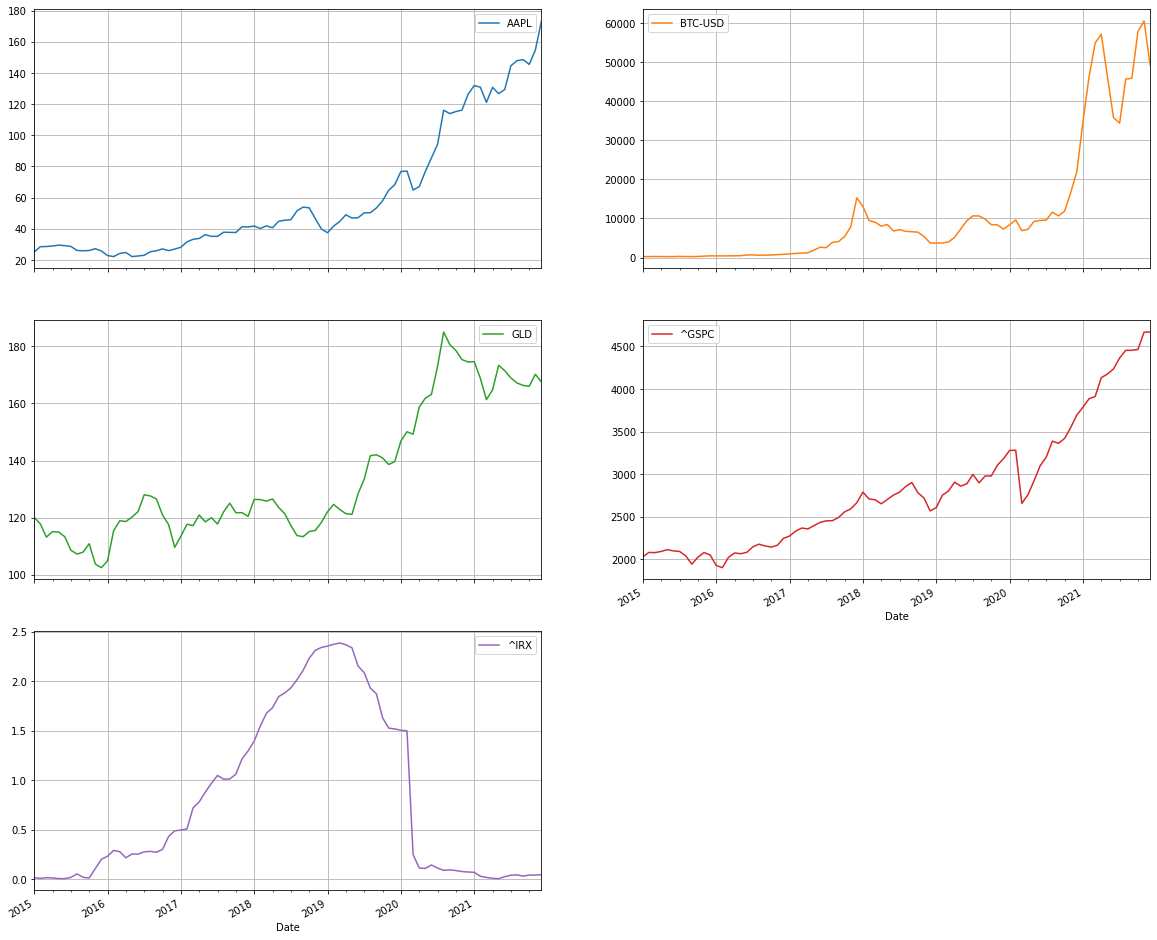

In [ ]:
df['2015':].resample('M').mean().plot(subplots=True, layout=(3,2), figsize=(20.0, 18.0), grid=True);

## 3) Compute descriptive statistics for monthly prices, index and returns

In [ ]:
# resample using end-of-the-month values
df_m = df.resample('M').last()
display(df_m.head(2))

# compute returns
l_assets = ['AAPL', 'BTC-USD', 'GLD', '^GSPC']
df_mr = df_m[l_assets].pct_change()
display(df_mr.head(2))

# select the sample period
df_m = df_m['2015':]
df_mr = df_mr['2015':]

,AAPL,BTC-USD,GLD,^GSPC,^IRX
Date,,,,,
2014-12-31,24.983654,320.192993,113.580002,2058.899902,0.037
2015-01-31,26.518257,217.464005,123.449997,1994.989990,0.005


,AAPL,BTC-USD,GLD,^GSPC
Date,,,,
2014-12-31,NaN,NaN,NaN,NaN
2015-01-31,0.061424,-0.320835,0.086899,-0.031041


In [ ]:
print("Descriptive statistics for daily data:")
display(df_m.describe())

print('\n\n')

print("Descriptive statistics for monthly returns:")
display(df_mr.describe())

Descriptive statistics for daily data:


,AAPL,BTC-USD,GLD,^GSPC,^IRX
count,84.000000,84.000000,84.000000,84.000000,84.000000
mean,60.398136,11300.793447,133.866072,2828.010363,0.793690
std,41.820262,15875.082905,23.241248,739.987637,0.844199
min,21.695923,217.464005,101.459999,1920.030029,0.003000
25%,28.526733,694.063232,117.270000,2172.937561,0.055500
50%,42.482855,6453.522217,123.820000,2708.505005,0.304000
75%,73.471256,10274.674805,151.697502,3110.462524,1.517500
max,178.199997,61318.957031,185.429993,4778.729980,2.383000





Descriptive statistics for monthly returns:


,AAPL,BTC-USD,GLD,^GSPC
count,84.000000,84.000000,84.000000,84.000000
mean,0.026897,0.085254,0.005641,0.010942
std,0.081294,0.231965,0.041556,0.041832
min,-0.181198,-0.364116,-0.083566,-0.125119
25%,-0.030701,-0.071744,-0.020915,-0.005180
50%,0.043633,0.064405,-0.001457,0.016253
75%,0.083830,0.243774,0.027749,0.034079
max,0.216569,0.696288,0.109303,0.126844


## 4) Compute correlations between monthly asset returns

In [ ]:
df_mr.corr()

,AAPL,BTC-USD,GLD,^GSPC
AAPL,1.000000,0.179682,0.098492,0.634107
BTC-USD,0.179682,1.000000,0.021198,0.274188
GLD,0.098492,0.021198,1.000000,0.016286
^GSPC,0.634107,0.274188,0.016286,1.000000


## 5) Assuming S&P 500 represents the market portfolio, compute the beta of Apple and the beta of Bitcoin

In [ ]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
import statsmodels.api as sm

def compute_beta(key):
  """Compute the beta for an asset in our dataset of returns"""
  results = sm.OLS(df_mr[key], sm.add_constant(df_mr['^GSPC'])).fit()
  print('\n***\n')
  print('Beta of {} is {:.3f}'.format(key, results.params['^GSPC']))
  print(results.summary())

compute_beta('AAPL')
compute_beta('BTC-USD')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



***

Beta of AAPL is 1.232
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     55.14
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           9.47e-11
Time:                        08:45:25   Log-Likelihood:                 113.73
No. Observations:                  84   AIC:                            -223.5
Df Residuals:                      82   BIC:                            -218.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0134   

In [ ]:
# alternative:

# variance-covariance matrix
c = df_mr.cov()

# variance of market returns
var_mkt = c['^GSPC']['^GSPC']

# covariance of asset returns with market returns
cov_aapl = c['^GSPC']['AAPL']
cov_btc = c['^GSPC']['BTC-USD']

print('Beta of AAPL is {:.3f}'.format(cov_aapl/var_mkt))
print('Beta of BTC is {:.3f}'.format(cov_btc/var_mkt))

c

Beta of AAPL is 1.232
Beta of BTC is 1.520


,AAPL,BTC-USD,GLD,^GSPC
AAPL,0.006609,0.003388,0.000333,0.002156
BTC-USD,0.003388,0.053808,0.000204,0.002661
GLD,0.000333,0.000204,0.001727,0.000028
^GSPC,0.002156,0.002661,0.000028,0.001750
